## ProjF3 - Baseline Model

Group Number: 141

Sakshi Basapure, sbasapu

Nilesh Singh, nsrajesh

Meet Patel, mpatel29

### 1. Load and Prepare Data

In [1]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, UnidentifiedImageError
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
# getting the training and validation data from the 
data_dir = "/Users/mj/Desktop/NeuralNetwork/Project/archive/NewPlantDiseasesDataset(Augmented)/NewPlantDiseasesDataset(Augmented)"
train_image_path = data_dir + "/train"
valid_image_path = data_dir + "/valid"
diseases = os.listdir(train_image_path)
print(diseases)

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', '.DS_Store', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

In [3]:
IMG_WIDTH = 100
IMG_HEIGHT = 100
batch_size=32

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_image_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 70295 images belonging to 38 classes.


In [5]:
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data_generator=testdata_generator.flow_from_directory(valid_image_path,
                                                           batch_size=batch_size,
                                                           class_mode="categorical",
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                           color_mode="rgb",shuffle=False )

Found 17572 images belonging to 38 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(valid_image_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=batch_size,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 17572 images belonging to 38 classes.


In [7]:
train_number=train_generator.samples
valid_number=validation_generator.samples

## 2. Prepare your Baseline Model

In [8]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dropout(0.5),
        Dense(units=38, activation='sigmoid')
    ])

    return model


In [9]:
cnn_model = create_model()

In [10]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       9728      
                                                                 
 activation (Activation)     (None, 96, 96, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 48, 48, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 46, 46, 64)        0

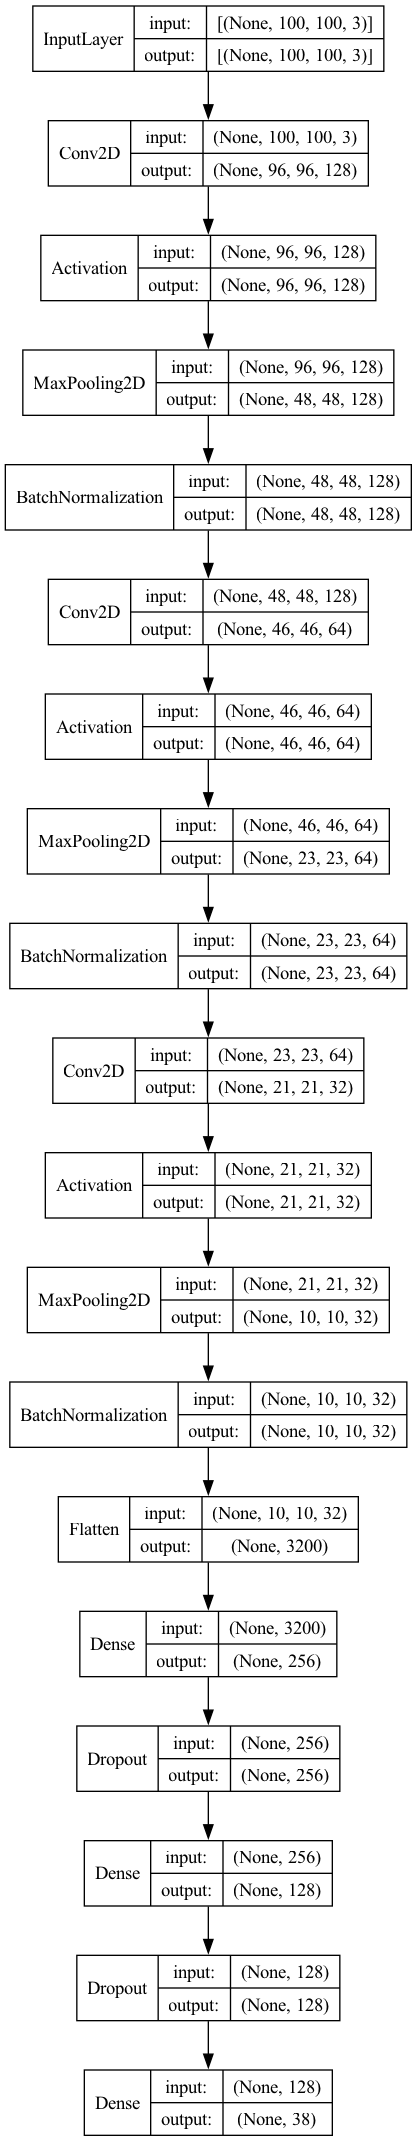

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, expand_nested=True, show_shapes=True, show_layer_names=False)

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
optimizer = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],loss_weights=[1, 0.3, 0.3], metrics=['accuracy'])

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
history = cnn_model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=train_number // batch_size,
                        epochs=50, 
                        validation_steps=valid_number // batch_size,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
2196/2196 - 373s - loss: 3.0537 - accuracy: 0.1968 - val_loss: 2.2077 - val_accuracy: 0.3815 - lr: 1.0000e-04 - 373s/epoch - 170ms/step
Epoch 2/50
2196/2196 - 365s - loss: 2.1759 - accuracy: 0.3825 - val_loss: 1.6928 - val_accuracy: 0.5222 - lr: 1.0000e-04 - 365s/epoch - 166ms/step
Epoch 3/50
2196/2196 - 367s - loss: 1.7638 - accuracy: 0.4909 - val_loss: 1.7865 - val_accuracy: 0.5166 - lr: 1.0000e-04 - 367s/epoch - 167ms/step
Epoch 4/50
2196/2196 - 372s - loss: 1.4810 - accuracy: 0.5697 - val_loss: 2.9841 - val_accuracy: 0.3581 - lr: 1.0000e-04 - 372s/epoch - 169ms/step
Epoch 5/50
2196/2196 - 373s - loss: 1.2649 - accuracy: 0.6283 - val_loss: 0.9370 - val_accuracy: 0.7153 - lr: 1.0000e-04 - 373s/epoch - 170ms/step
Epoch 6/50
2196/2196 - 369s - loss: 1.1008 - accuracy: 0.6773 - val_loss: 1.0412 - val_accuracy: 0.6956 - lr: 1.0000e-04 - 369s/epoch - 168ms/step
Epoch 7/50
2196/2196 - 366s - loss: 0.9677 - accuracy: 0.7147 - val_loss: 0.6443 - val_accuracy: 0.7955 - lr: 1.0000e-

## 3. Baseline Performance

#### Plotting the Model Metrics
##### Plotting training and validation accuracy, loss and learning rate

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

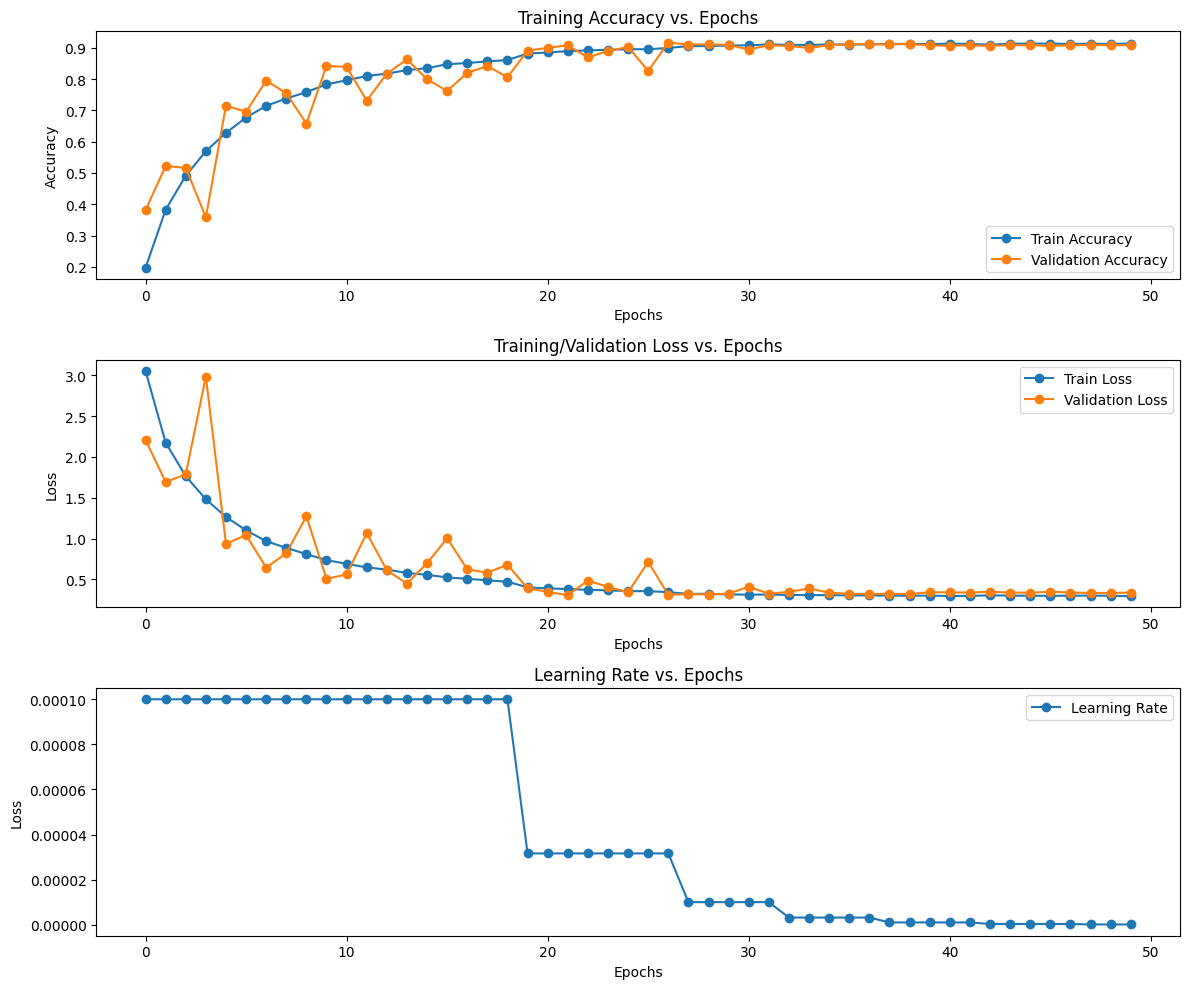

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

##### Save Model

In [19]:
cnn_model.save("model.h5")
from tensorflow.keras.models import load_model

cnn_model = load_model("model.h5")

##### Model Prediction on the Test Dataset

In [20]:
predictions = cnn_model.predict(test_data_generator)

550/550 [==============================] - 26s 47ms/step


In [21]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Apple___Apple_scab
1 : Apple___Black_rot
2 : Apple___Cedar_apple_rust
3 : Apple___healthy
4 : Blueberry___healthy
5 : Cherry_(including_sour)___Powdery_mildew
6 : Cherry_(including_sour)___healthy
7 : Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8 : Corn_(maize)___Common_rust_
9 : Corn_(maize)___Northern_Leaf_Blight
10 : Corn_(maize)___healthy
11 : Grape___Black_rot
12 : Grape___Esca_(Black_Measles)
13 : Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14 : Grape___healthy
15 : Orange___Haunglongbing_(Citrus_greening)
16 : Peach___Bacterial_spot
17 : Peach___healthy
18 : Pepper,_bell___Bacterial_spot
19 : Pepper,_bell___healthy
20 : Potato___Early_blight
21 : Potato___Late_blight
22 : Potato___healthy
23 : Raspberry___healthy
24 : Soybean___healthy
25 : Squash___Powdery_mildew
26 : Strawberry___Leaf_scorch
27 : Strawberry___healthy
28 : Tomato___Bacterial_spot
29 : Tomato___Early_blight
30 : Tomato___Late_b

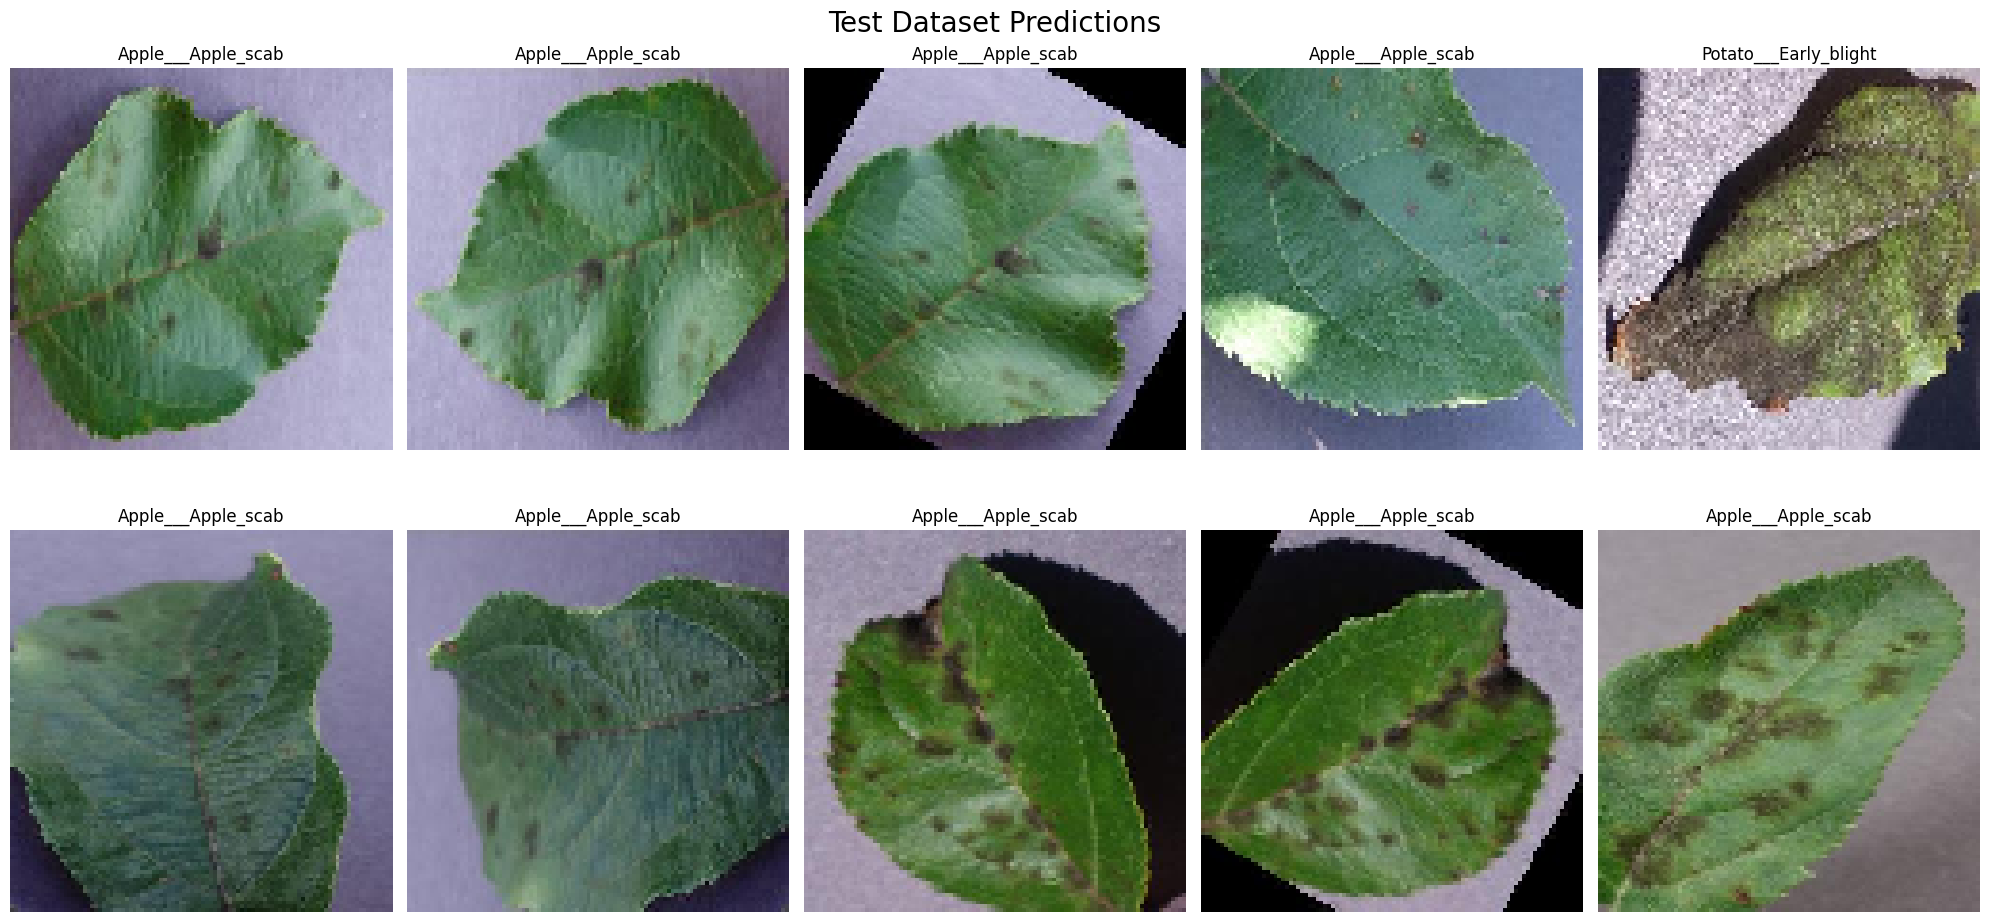

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_data_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()


In [23]:
test_loss, test_accuracy = cnn_model.evaluate(test_data_generator, batch_size=batch_size)

550/550 [==============================] - 28s 50ms/step - loss: 0.3383 - accuracy: 0.9080


In [24]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.3382551074028015
Test Accuracy: 0.9080355167388916
